In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings("ignore")
import platform
print("platform.python_version() ", platform.python_version())

BASEDIR = './data/'
OUTDIR ='./out/'

platform.python_version()  3.9.16


In [2]:
data = Dataset(BASEDIR+'MERRA2_400.tavg1_2d_slv_Nx.20230701.nc4', mode='r')
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    History: Original file generated: Tue Jul 11 23:02:24 2023 GMT
    Comment: GMAO filename: d5124_m2_jan10.tavg1_2d_slv_Nx.20230701.nc4
    Filename: MERRA2_400.tavg1_2d_slv_Nx.20230701.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2T1NXSLV
    GranuleID: MERRA2_400.tavg1_2d_slv_Nx.20230701.nc4
    ProductionDateTime: Original file generated: Tue Jul 11 23:02:24 2023 GMT
    LongName: MERRA2 tavg1_2d_slv_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Single-Level Diagnostics
    Title: MERRA2 tavg1_2d_slv_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Single-Level Diagnostics
    SouthernmostLatitude: -90.0


In [3]:
# longitude and latitude
lons = data.variables['lon']
lats = data.variables['lat']
lon, lat = np.meshgrid(lons, lats)
# 2-meter eastward wind m/s
U2M = data.variables['U2M']
# 2-meter northward wind m/s
V2M = data.variables['V2M']

In [4]:
U2M_nans = U2M[:]
V2M_nans = V2M[:]
_FillValueU2M = U2M._FillValue
_FillValueV2M = V2M._FillValue
U2M_nans[U2M_nans == _FillValueU2M] = np.nan
V2M_nans[V2M_nans == _FillValueV2M] = np.nan

In [5]:
ws = np.sqrt(U2M_nans**2+V2M_nans**2)
ws_direction = np.arctan2(V2M_nans,U2M_nans)
ws_daily_avg = np.nanmean(ws, axis=0)
U2M_daily_avg = np.nanmean(U2M_nans, axis=0)
V2M_daily_avg = np.nanmean(V2M_nans, axis=0)
ws_daily_avg_direction = np.arctan2(V2M_daily_avg, U2M_daily_avg)

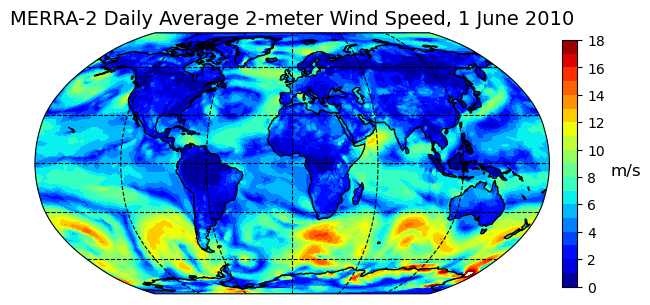

In [6]:
# Set the figure size, projection, and extent
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

# Plot windspeed:
# Set contour levels, then draw the plot and a colorbar
clevs = np.arange(0,19,1)
plt.contourf(lon, lat, ws_daily_avg, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 Daily Average 2-meter Wind Speed, 1 June 2010', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

In [10]:
fig.savefig(OUTDIR+'MERRA2_2m_ws.png', format='png', dpi=120)

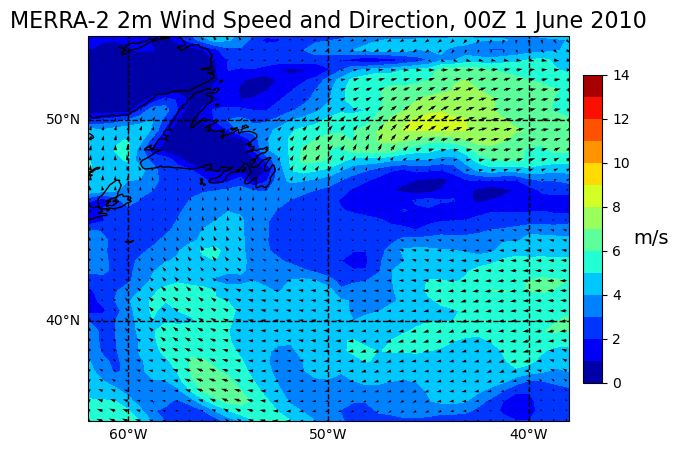

In [8]:
# Set the figure size, projection, and extent
fig = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-62,-38,35,54])
ax.coastlines(resolution="50m",linewidth=1)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-65,-60,-50,-40,-30])
gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

# Plot windspeed
clevs = np.arange(0,14.5,1)
plt.contourf(lon, lat, ws[0,:,:], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('MERRA-2 2m Wind Speed and Direction, 00Z 1 June 2010', size=16)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=14,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)
# Overlay wind vectors
qv = plt.quiver(lon, lat, U2M_nans[0,:,:], V2M_nans[0,:,:], scale=420, color='k')

In [11]:
fig.savefig('MERRA2_2m_wsVECTORS.png', format='png', dpi=120)